<h2><b>Corrosion Resistant Materials</b></h2>
<font size="3">

<hr>
DISTRIBUTION STATEMENT A. Approved for public release. Distribution is unlimited.

This material is based upon work supported by the Under Secretary of Defense for
Research and Engineering under Air Force Contract No. FA8702-15-D-0001. Any opinions,
findings, conclusions or recommendations expressed in this material are those of the
author(s) and do not necessarily reflect the views of the Under Secretary of Defense
for Research and Engineering.

© 2025 Massachusetts Institute of Technology.

The software/firmware is provided to you on an As-Is basis

Delivered to the U.S. Government with Unlimited Rights, as defined in DFARS Part
252.227-7013 or 7014 (Feb 2014). Notwithstanding any copyright notice, U.S. Government
rights in this work are defined by DFARS 252.227-7013 or DFARS 252.227-7014 as detailed
above. Use of this work other than as specifically authorized by the U.S. Government
may violate any copyrights that exist in this work.
<hr><hr>
</font>

<div class=\"alert alert-block alert-info\"> <b>REFERENCE:</b> A comprehensive description of this application is provided in <a href=\"https://arxiv.org/abs/2406.18759"><b>arXiv:2406.18759</b></a>. We provide a brief summary below.</div>

# 1. Application Overview

Corrosion is a pervasive issue that impacts the structural integrity and performance of materials across various industries, imposing a significant economic impact globally. In fields like aerospace and defense, developing corrosion-resistant materials is critical, but progress is often hindered by the complexities of material-environment interactions. While computational methods have advanced in designing corrosion inhibitors and corrosion-resistant materials, they fall short in understanding the fundamental corrosion mechanisms due to the highly correlated nature of the systems involved. A hybrid classical-quantum workflow could offer a path forward for investigating these mechanisms.

For this application, we look at two classes of alloys: one set of magnesium models, and one set of niobium models. The model we use is the electronic structure Hamiltonian expressed in a periodic basis. One subtlety with this basis selection is the use of pseudopotentials to represent core
electrons as a classical potential, leading to lower energy cutoffs and smaller basis sets. This is a common technique used in classical computing methods, but its effect on computational resources in quantum methods is underexplored. As such, **we include two estimates below**. The first assumes all electrons are included in the calculation, which limits the additional costs from pseudopotentials. The second uses only valence electrons and should be viewed as an optimistic estimate since it does not include the additional resources needed to encode the pseudopotentials.

For these estimates, there are two relevant models. One is the first-quantized, plane-wave basis Hamiltonian which under the Born-Oppenheimer approximation can be expressed as

\begin{align*}
H &= T + U + V + \frac{1}{2}\sum_{\ell\neq\kappa=1}^L \frac{\zeta_\ell \zeta_\kappa}{||R_\ell - R_\kappa||} 
&T& = \sum_{i=1}^\eta \sum_{p\in G} \frac{||k_p||^2}{2} |p\rangle \langle p|_i \\
U &= -\frac{4\pi}{\Omega} \sum_{\ell=1}^{L}\sum_{i=1}^{\eta}\sum_{\substack{p,q\in G \\ p\neq q}} \left( \zeta_\ell \frac{e^{ik_{q-p}\cdot R_\ell}}{||k_{p-q}||^2}\right) |p\rangle \langle q|_i 
&V& = \frac{2\pi}{\Omega} \sum_{i\neq j = 1}^\eta \sum_{p,q \in G} \sum_{\substack{\nu\in G_0 \\ (p+\nu)\in G\\ (q-\nu)\in G}} \frac{1}{||k_\nu||^2} |p+\nu\rangle\langle p|_i |q-\nu\rangle\langle q|_j,
\end{align*}

where $\eta$ is the number of electrons, $L$ is the number of atoms, $R_\ell$ is the location of each atom, $\zeta_\ell$ is the atomic number, $\Omega$ is the computational cell volume, $k_p=\frac{2\pi p}{\Omega^{1/3}}$ is a 3-dimensional recipricol lattice vector, $p\in G$,

$$
G = \left[-\frac{N^{1/3}-1}{2}, \frac{N^{1/3}-1}{2} \right]^3 \subset \mathbb{Z}^3, \quad \quad \quad G_0 = \left[-N^{1/3}, N^{1/3} \right]^3 \subset \mathbb{Z}^3 \backslash \{(0,0,0)\},
$$
and $N$ is the number of plane waves making up the basis.

The second is the second-quantized, dual plane-wave basis Hamiltonian, expressed as:

$$
H = \sum_{p,q,\sigma} T(p-q) a^\dagger_{p,\sigma}a_{q,\sigma} + \sum_{p,\sigma} U(p) n_{p,\sigma} + \sum_{(p,\alpha)\neq(q,\beta)} V(p-q)n_{p,\alpha}n_{q,\beta}
$$

with 

$$
T(p) = \sum_\nu \frac{k_\nu^2 \cos(k_\nu \cdot r_p)}{2N}, \quad U(p) = -\frac{4\pi\zeta_j \cos(k_\nu\cdot R_j - k_\nu\cdot r_p)}{\Omega k_\nu^2}, \quad V(p) = \sum_{\nu\neq 0}\frac{2\pi\cos(k_\nu\cdot r_p)}{\Omega k_\nu^2}
$$

where $a^\dagger_{p,\sigma}$ and $a_{p,\sigma}$ are fermionic creation and annihilation operators on spatial orbital $p$ with spin $\sigma \in \{\uparrow,\downarrow\}$, $n_{p,\sigma} = a^\dagger_{p,\sigma}a_{p,\sigma}$ is the number operator, and $r_p = p (2\Omega/N)^{1/3}$ is an orbital centroid.

Using these formulations, we will look at a set of magnesium models and a set of niobium models of varying complexity that are representative of systems of interest to corrosion scientists. Quantum chemistry simulations for these types of systems are used for predicting electronic structure properties and improving material design. The use of a quantum computer in this workflow has the potential to improve the accuracy over classical simulations and to extend simulations to more complex systems.

<hr>

# 2. Baseline Logical Resource Estimates

For the baseline resource estimates, we use the molecular parameters from [arxiv:2406.18759](https://arxiv.org/abs/2406.18759) summarized in the tables below. We estimate the logical resources for qubitized phase estimation with the block encoding given in Section II of [arxiv:2105.12767](https://arxiv.org/abs/2105.12767) in the first quantized case and the block encoding given in Section IV of [arxiv:1805.03662](https://arxiv.org/abs/1805.03662) in the second quantized case. We do this for an energy cutoff of $40$ Ry and an allowable RMS error of $0.001$ in the estimated energy. Comprehensive overviews of the simulation methods are provided in [Examples/ApplicationInstances/PeriodicChemistry/encoding_in_first_quantization.ipynb](../PeriodicChemistry/encoding_in_first_quantization.ipynb) and [Examples/ApplicationInstances/PeriodicChemistry/resource_estimates-electronic_structure-mg_slab.ipynb](../PeriodicChemistry/resource_estimates-electronic_structure-mg_slab.ipynb).

In [1]:
import numpy as np
from pyLIQTR.ProblemInstances.getInstance   import *
from pyLIQTR.BlockEncodings.getEncoding     import *
from pyLIQTR.utils.resource_analysis        import estimate_resources
from pyLIQTR.qubitization.phase_estimation  import QubitizedPhaseEstimation

## Estimate using all electrons

In [ ]:
all_re = {}

### Magnesium Models

For the magnesium models, we use the first quantized, plane-wave model. The resource estimates for the Supercell model take around 1.5 hours to run. All others run in 20 minutes or less. The precomputed counts are provided below.

<b>Table 1:</b> Properties of magnesium models relevant for the first quantized block encoding with $E_{\text{cut}}$=40 Ry.

| Model | $\eta$ | $\lambda_{\zeta} = \sum_\ell \zeta_\ell$ | $L$ | Cell size ($\text{\r{A}}$)|
| --- | --- | --- | --- | --- |
| Mg Dimer | 788 | 788 | 76 | 12.7 x 12.7 x 19.9 |
| Mg Monolayer | 2419 | 2419 | 335 | 19.8 x 19.8 x 32.3 |
| Mg Cluster | 3907 | 3907 | 887 | 19.8 x 19.8 x 58.9 |
| $\text{Mg}_{17}\text{Al}_{12}$ 2nd phase supercell | 10620 | 10620 | 1107 | 33.0 x 31.3 x 50.3 |

<a id='tab1'></a>
Note $\eta = \lambda_\zeta$ for charge neutral systems.

In [ ]:
# set energy cutoff
E_cut_off = 40

# set precision parameters
eps = 1e-3
eps_M = eps_T = eps_R = eps/10
eps_pha = np.sqrt(eps**2 - (eps_M+eps_R+eps_T)**2)

In [ ]:
### Mg Dimer
lengths            =  [12.7,12.7,19.9]
mg_dimer_instance  =  getInstance('MoleculeParameters',num_electrons=788,num_atoms=76,sum_atomic_num=788,cell_volume=np.prod(lengths), E_cut_off=E_cut_off, lengths=lengths)
mg_dimer_encoding  =  getEncoding(VALID_ENCODINGS.FirstQuantized, instance=mg_dimer_instance, eps_M=eps_M,eps_R=eps_R,eps_T=eps_T)
mg_dimer_qpe       =  QubitizedPhaseEstimation(mg_dimer_encoding,eps=eps_pha)
mg_dimer_resources =  estimate_resources(mg_dimer_qpe)
all_re["Mg Dimer"] =  mg_dimer_resources

In [ ]:
### Mg Monolayer
lengths                =  [19.8,19.8,32.3]
mg_monolayer_instance  =  getInstance('MoleculeParameters',num_electrons=2419,num_atoms=335,sum_atomic_num=2419,cell_volume=np.prod(lengths), E_cut_off=E_cut_off, lengths=lengths)
mg_monolayer_encoding  =  getEncoding(VALID_ENCODINGS.FirstQuantized, instance=mg_monolayer_instance, eps_M=eps_M,eps_R=eps_R,eps_T=eps_T)
mg_monolayer_qpe       =  QubitizedPhaseEstimation(mg_monolayer_encoding,eps=eps_pha)
mg_monolayer_resources =  estimate_resources(mg_monolayer_qpe)
all_re["Mg Monolayer"] =  mg_monolayer_resources

In [ ]:
### Mg Cluster
lengths              =  [19.8,19.8,32.3]
mg_cluster_instance  =  getInstance('MoleculeParameters',num_electrons=3907,num_atoms=887,sum_atomic_num=3907,cell_volume=np.prod(lengths), E_cut_off=E_cut_off, lengths=lengths)
mg_cluster_encoding  =  getEncoding(VALID_ENCODINGS.FirstQuantized, instance=mg_cluster_instance, eps_M=eps_M,eps_R=eps_R,eps_T=eps_T)
mg_cluster_qpe       =  QubitizedPhaseEstimation(mg_cluster_encoding,eps=eps_pha)
mg_cluster_resources =  estimate_resources(mg_cluster_qpe)
all_re["Mg Cluster"] =  mg_cluster_resources


In [ ]:
### (Mg17)(Al12) Secondary-phase Supercell
lengths                =  [33.0,31.3,50.3]
mg_supercell_instance  =  getInstance('MoleculeParameters',num_electrons=10620,num_atoms=1107,sum_atomic_num=10620,cell_volume=np.prod(lengths), E_cut_off=E_cut_off, lengths=lengths)
mg_supercell_encoding  =  getEncoding(VALID_ENCODINGS.FirstQuantized, instance=mg_supercell_instance, eps_M=eps_M,eps_R=eps_R,eps_T=eps_T)
mg_supercell_qpe       =  QubitizedPhaseEstimation(mg_supercell_encoding,eps=eps_pha)
mg_supercell_resources =  estimate_resources(mg_supercell_qpe)
all_re["(Mg17)(Al12) Secondary-phase Supercell"] =  mg_supercell_resources

### Niobium Models

For the Niobium models we use the second quantized, dual plane-wave model. Since generating the input files for this model is computationally intensive, the two larger models use an energy cutoff of 30 Ry instead of 40 Ry. Each estimate runs in about 20 minutes. The precomputed counts are provided below.

In [16]:
def get_approx_error(energy_error,alpha,num_coeffs,digits=1):
    """calculates upper bound on approx_error given desired precision of estimated energy spectra (energy_error) and Hamiltonian norm (alpha). Based on Eq. 36 in https://arxiv.org/pdf/1805.03662.pdf"""
    mu = np.ceil(np.log2(2*np.sqrt(2)*alpha / energy_error))
    approx_error_upper_bound = 1/(2**mu * num_coeffs)
    power = "{:e}".format(approx_error_upper_bound).split('e')[1]
    return round(approx_error_upper_bound, -(int(power) - digits))

In [ ]:
### (Nb97)(Hf3)(Ti22)(Zr6)(O)
hamfile = './corrosion_resistant_materials_data/nb_alloy1_30_ham.hdf5'
gridfile = './corrosion_resistant_materials_data/nb_alloy1_30_grid.hdf5'
energy_error = 1e-3
alpha = 1.55e6

slab = getInstance('ElectronicStructure', filenameH=hamfile, filenameG=gridfile)
num_coeffs = 3*2*slab._N
approx_error = get_approx_error(energy_error=energy_error,alpha=alpha,num_coeffs=num_coeffs)
encoding = getEncoding(VALID_ENCODINGS.LinearT,instance = slab,approx_error=approx_error)
prec  =  int(np.ceil( np.log2( (np.sqrt(2.0)*np.pi*alpha) / (2*energy_error) ) ))
qpe = QubitizedPhaseEstimation(encoding,prec=prec)
nb_1_resources = estimate_resources(qpe.circuit,circuit_precision=1e-4)
all_re["(Nb97)(Hf3)(Ti22)(Zr6)(O)"] =  nb_1_resources

In [ ]:
### (Nb97)(Ta22)(Zr3)(W6)(O)
hamfile = './corrosion_resistant_materials_data/nb_alloy2_30_ham.hdf5'
gridfile = './corrosion_resistant_materials_data/nb_alloy2_30_grid.hdf5'
energy_error = 1e-3
alpha = 1.55e6

slab = getInstance('ElectronicStructure', filenameH=hamfile, filenameG=gridfile)
num_coeffs = 3*2*slab._N
approx_error = get_approx_error(energy_error=energy_error,alpha=alpha,num_coeffs=num_coeffs)
encoding = getEncoding(VALID_ENCODINGS.LinearT,instance = slab,approx_error=approx_error)
prec  =  int(np.ceil( np.log2( (np.sqrt(2.0)*np.pi*alpha) / (2*energy_error) ) ))
qpe = QubitizedPhaseEstimation(encoding,prec=prec)
nb_2_resources = estimate_resources(qpe.circuit,circuit_precision=1e-4)
all_re["(Nb97)(Ta22)(Zr3)(W6)(O)"] = nb_2_resources

In [ ]:
### (Nb42)(Ti3)(Hf3)(Ta3)(Zr3)(O)
hamfile = './corrosion_resistant_materials_data/nb_oxygen_40_ham.hdf5'
gridfile = './corrosion_resistant_materials_data/nb_oxygen_40_grid.hdf5'
energy_error = 1e-3
alpha = 1.18e6

slab = getInstance('ElectronicStructure', filenameH=hamfile, filenameG=gridfile)
num_coeffs = 3*2*slab._N
approx_error = get_approx_error(energy_error=energy_error,alpha=alpha,num_coeffs=num_coeffs)
encoding = getEncoding(VALID_ENCODINGS.LinearT,instance = slab,approx_error=approx_error)
prec  =  int(np.ceil( np.log2( (np.sqrt(2.0)*np.pi*alpha) / (2*energy_error) ) ))
qpe = QubitizedPhaseEstimation(encoding,prec=prec)
nb_3_resources = estimate_resources(qpe.circuit,circuit_precision=1e-4)
all_re["(Nb42)(Ti3)(Hf3)(Ta3)(Zr3)(O)"] =  nb_3_resources

In [ ]:
### (Nb65)(Zr6)(Hf7)(Ti4)(W3)
hamfile = './corrosion_resistant_materials_data/nb_alloy_wo_oxygen_40_ham.hdf5'
gridfile = './corrosion_resistant_materials_data/nb_alloy_wo_oxygen_40_grid.hdf5'
energy_error = 1e-3
alpha = 1.69e6

slab = getInstance('ElectronicStructure', filenameH=hamfile, filenameG=gridfile)
num_coeffs = 3*2*slab._N
approx_error = get_approx_error(energy_error=energy_error,alpha=alpha,num_coeffs=num_coeffs)
encoding = getEncoding(VALID_ENCODINGS.LinearT,instance = slab,approx_error=approx_error)
prec  =  int(np.ceil( np.log2( (np.sqrt(2.0)*np.pi*alpha) / (2*energy_error) ) ))
qpe = QubitizedPhaseEstimation(encoding,prec=prec)
nb_4_resources = estimate_resources(qpe.circuit,circuit_precision=1e-4)
all_re["(Nb65)(Zr6)(Hf7)(Ti4)(W3)"] =  nb_4_resources

### Precomputed Counts

In [2]:
all_re = {
 'Mg Dimer': {'LogicalQubits': 12278,
  'T': 776895159377880,
  'Clifford': 1301534004672757},
 'Mg Monolayer': {'LogicalQubits': 44077,
  'T': 44215691879959128,
  'Clifford': 71233338274464525},
 'Mg Cluster': {'LogicalQubits': 70872,
  'T': 141585349259351488,
  'Clifford': 222037302258694473},
 '(Mg17)(Al12) Secondary-phase Supercell': {'LogicalQubits': 223645,
  'T': 3556340673227587256,
  'Clifford': 5519177836017269773},
 '(Nb97)(Hf3)(Ti22)(Zr6)(O)': {'LogicalQubits': 21451, 
  'T': 3089979861377536, 
  'Clifford': 23338027652784961},
 '(Nb97)(Ta22)(Zr3)(W6)(O)': {'LogicalQubits': 21451, 
  'T': 3058849938416128, 
  'Clifford': 23041812348314433},
 '(Nb42)(Ti3)(Hf3)(Ta3)(Zr3)(O)': {'LogicalQubits': 16151, 
  'T': 2342827350565376, 
  'Clifford': 17029803026719553},
 '(Nb65)(Zr6)(Hf7)(Ti4)(W3)': {'LogicalQubits': 17597, 
  'T': 2536135238623744, 
  'Clifford': 18609010961851201}
  }

## Estimate using only valence electrons (optimistic)

For the valence electrons only case, we use the first quantized, plane-wave model for both the magnesium and niobium instances. Each estimate runs in a few minutes or less. The precomputed counts are provided below.

In [2]:
all_re_valence = {}

### Magnesium Models

<b>Table 1:</b> Properties of magnesium models relevant for the first quantized block encoding with $E_{\text{cut}}$=40 Ry.

| Model | $\eta$ | $\lambda_{\zeta} = \sum_\ell \zeta_\ell$ | $L$ | Cell size ($\text{\r{A}}$)|
| --- | --- | --- | --- | --- |
| Mg Dimer | 144 | 144 | 76 | 12.7 x 12.7 x 19.9 |
| Mg Monolayer | 567 | 567 | 335 | 19.8 x 19.8 x 32.3 |
| Mg Cluster | 1477 | 1477 | 887 | 19.8 x 19.8 x 58.9 |
| $\text{Mg}_{17}\text{Al}_{12}$ 2nd phase supercell | 1830 | 1830 | 1107 | 33.0 x 31.3 x 50.3 |

<a id='tab1'></a>
Note $\eta = \lambda_\zeta$ for charge neutral systems.

In [3]:
# set energy cutoff
E_cut_off = 40

# set precision parameters
eps = 1e-3
eps_M = eps_T = eps_R = eps/10
eps_pha = np.sqrt(eps**2 - (eps_M+eps_R+eps_T)**2)

In [4]:
### Mg Dimer
lengths            =  [12.7,12.7,19.9]
mg_dimer_instance  =  getInstance('MoleculeParameters',num_electrons=144,num_atoms=76,sum_atomic_num=144,cell_volume=np.prod(lengths), E_cut_off=E_cut_off, lengths=lengths)
mg_dimer_encoding  =  getEncoding(VALID_ENCODINGS.FirstQuantized, instance=mg_dimer_instance, eps_M=eps_M,eps_R=eps_R,eps_T=eps_T)
mg_dimer_qpe       =  QubitizedPhaseEstimation(mg_dimer_encoding,eps=eps_pha)
mg_dimer_resources =  estimate_resources(mg_dimer_qpe)
all_re_valence["Mg Dimer"] =  mg_dimer_resources

<attrs generated getattr pyLIQTR.circuits.operators.PrepareZetaState.PrepareZetaState>:6: UserWarning: Desired precision 87 is beyond system spec 63. Using system spec instead. This will result in lower Clifford gate count.
  result = func(self)


In [5]:
### Mg Monolayer
lengths                =  [19.8,19.8,32.3]
mg_monolayer_instance  =  getInstance('MoleculeParameters',num_electrons=567,num_atoms=335,sum_atomic_num=567,cell_volume=np.prod(lengths), E_cut_off=E_cut_off, lengths=lengths)
mg_monolayer_encoding  =  getEncoding(VALID_ENCODINGS.FirstQuantized, instance=mg_monolayer_instance, eps_M=eps_M,eps_R=eps_R,eps_T=eps_T)
mg_monolayer_qpe       =  QubitizedPhaseEstimation(mg_monolayer_encoding,eps=eps_pha)
mg_monolayer_resources =  estimate_resources(mg_monolayer_qpe)
all_re_valence["Mg Monolayer"] =  mg_monolayer_resources

<attrs generated getattr pyLIQTR.circuits.operators.PrepareZetaState.PrepareZetaState>:6: UserWarning: Desired precision 102 is beyond system spec 63. Using system spec instead. This will result in lower Clifford gate count.
  result = func(self)


In [6]:
### Mg Cluster
lengths              =  [19.8,19.8,32.3]
mg_cluster_instance  =  getInstance('MoleculeParameters',num_electrons=1477,num_atoms=887,sum_atomic_num=1477,cell_volume=np.prod(lengths), E_cut_off=E_cut_off, lengths=lengths)
mg_cluster_encoding  =  getEncoding(VALID_ENCODINGS.FirstQuantized, instance=mg_cluster_instance, eps_M=eps_M,eps_R=eps_R,eps_T=eps_T)
mg_cluster_qpe       =  QubitizedPhaseEstimation(mg_cluster_encoding,eps=eps_pha)
mg_cluster_resources =  estimate_resources(mg_cluster_qpe)
all_re_valence["Mg Cluster"] =  mg_cluster_resources


<attrs generated getattr pyLIQTR.circuits.operators.PrepareZetaState.PrepareZetaState>:6: UserWarning: Desired precision 108 is beyond system spec 63. Using system spec instead. This will result in lower Clifford gate count.
  result = func(self)


In [7]:
### (Mg17)(Al12) Secondary-phase Supercell
lengths                =  [33.0,31.3,50.3]
mg_supercell_instance  =  getInstance('MoleculeParameters',num_electrons=1830,num_atoms=1107,sum_atomic_num=1830,cell_volume=np.prod(lengths), E_cut_off=E_cut_off, lengths=lengths)
mg_supercell_encoding  =  getEncoding(VALID_ENCODINGS.FirstQuantized, instance=mg_supercell_instance, eps_M=eps_M,eps_R=eps_R,eps_T=eps_T)
mg_supercell_qpe       =  QubitizedPhaseEstimation(mg_supercell_encoding,eps=eps_pha)
mg_supercell_resources =  estimate_resources(mg_supercell_qpe)
all_re_valence["(Mg17)(Al12) Secondary-phase Supercell"] =  mg_supercell_resources

<attrs generated getattr pyLIQTR.circuits.operators.PrepareZetaState.PrepareZetaState>:6: UserWarning: Desired precision 111 is beyond system spec 63. Using system spec instead. This will result in lower Clifford gate count.
  result = func(self)


### Niobium Models

<b>Table 2:</b> Properties of niobium models relevant for the first quantized block encoding with $E_{\text{cut}}$=40 Ry.

| Model | $\eta$ | $\lambda_{\zeta} = \sum_\ell \zeta_\ell$ | $L$ | Cell size ($\text{\r{A}}$)|
| --- | --- | --- | --- | --- |
| $\text{Nb}_{97}\text{Hf}_{3}\text{Ti}_{22}\text{Zr}_{6}\text{O}$ | 615 | 615 | 129 | 13.3 x 13.3 x 13.3 |
| $\text{Nb}_{97}\text{Ta}_{22}\text{Zr}_{3}\text{W}_{6}\text{O}$ | 649 | 649 | 129 | 13.3 x 13.3 x 13.3 |
| $\text{Nb}_{42}\text{Ti}_{3}\text{Hf}_{3}\text{Ta}_{3}\text{Zr}_{3}\text{O}$ | 267 | 267 | 55 | 10.0 x 10.0 x 10.1 |
| $\text{Nb}_{65}\text{Zr}_{6}\text{Hf}_{7}\text{Ti}_{4}\text{W}_{3}$ | 411 | 411 | 85 | 8.6 x 9.8 x 14.0 |

<a id='tab1'></a>
Note $\eta = \lambda_\zeta$ for charge neutral systems.


In [9]:
### (Nb97)(Hf3)(Ti22)(Zr6)(O)
lengths        =  [13.3,13.3,13.3]
nb_1_instance  =  getInstance('MoleculeParameters',num_electrons=615,num_atoms=129,sum_atomic_num=615,cell_volume=np.prod(lengths), E_cut_off=E_cut_off, lengths=lengths)
nb_1_encoding  =  getEncoding(VALID_ENCODINGS.FirstQuantized, instance=nb_1_instance, eps_M=eps_M,eps_R=eps_R,eps_T=eps_T)
nb_1_qpe       =  QubitizedPhaseEstimation(nb_1_encoding,eps=eps_pha)
nb_1_resources =  estimate_resources(nb_1_qpe)
all_re_valence["(Nb97)(Hf3)(Ti22)(Zr6)(O)"] =  nb_1_resources

<attrs generated getattr pyLIQTR.circuits.operators.PrepareZetaState.PrepareZetaState>:6: UserWarning: Desired precision 102 is beyond system spec 63. Using system spec instead. This will result in lower Clifford gate count.
  result = func(self)


In [10]:
### (Nb97)(Ta22)(Zr3)(W6)(O)
lengths        =  [13.3,13.3,13.3]
nb_2_instance  =  getInstance('MoleculeParameters',num_electrons=649,num_atoms=129,sum_atomic_num=649,cell_volume=np.prod(lengths), E_cut_off=E_cut_off, lengths=lengths)
nb_2_encoding  =  getEncoding(VALID_ENCODINGS.FirstQuantized, instance=nb_2_instance, eps_M=eps_M,eps_R=eps_R,eps_T=eps_T)
nb_2_qpe       =  QubitizedPhaseEstimation(nb_2_encoding,eps=eps_pha)
nb_2_resources =  estimate_resources(nb_2_qpe)
all_re_valence["(Nb97)(Ta22)(Zr3)(W6)(O)"] =  nb_2_resources

<attrs generated getattr pyLIQTR.circuits.operators.PrepareZetaState.PrepareZetaState>:6: UserWarning: Desired precision 102 is beyond system spec 63. Using system spec instead. This will result in lower Clifford gate count.
  result = func(self)


In [11]:
### (Nb42)(Ti3)(Hf3)(Ta3)(Zr3)(O)
lengths        =  [10.0,10.0,10.1]
nb_3_instance  =  getInstance('MoleculeParameters',num_electrons=267,num_atoms=55,sum_atomic_num=267,cell_volume=np.prod(lengths), E_cut_off=E_cut_off, lengths=lengths)
nb_3_encoding  =  getEncoding(VALID_ENCODINGS.FirstQuantized, instance=nb_3_instance, eps_M=eps_M,eps_R=eps_R,eps_T=eps_T)
nb_3_qpe       =  QubitizedPhaseEstimation(nb_3_encoding,eps=eps_pha)
nb_3_resources =  estimate_resources(nb_3_qpe)
all_re_valence["(Nb42)(Ti3)(Hf3)(Ta3)(Zr3)(O)"] =  nb_3_resources

<attrs generated getattr pyLIQTR.circuits.operators.PrepareZetaState.PrepareZetaState>:6: UserWarning: Desired precision 96 is beyond system spec 63. Using system spec instead. This will result in lower Clifford gate count.
  result = func(self)


In [12]:
### (Nb65)(Zr6)(Hf7)(Ti4)(W3)
lengths        =  [8.6,9.8,14.0]
nb_4_instance  =  getInstance('MoleculeParameters',num_electrons=411,num_atoms=85,sum_atomic_num=411,cell_volume=np.prod(lengths), E_cut_off=E_cut_off, lengths=lengths)
nb_4_encoding  =  getEncoding(VALID_ENCODINGS.FirstQuantized, instance=nb_4_instance, eps_M=eps_M,eps_R=eps_R,eps_T=eps_T)
nb_4_qpe       =  QubitizedPhaseEstimation(nb_4_encoding,eps=eps_pha)
nb_4_resources =  estimate_resources(nb_4_qpe)
all_re_valence["(Nb65)(Zr6)(Hf7)(Ti4)(W3)"] =  nb_4_resources

<attrs generated getattr pyLIQTR.circuits.operators.PrepareZetaState.PrepareZetaState>:6: UserWarning: Desired precision 99 is beyond system spec 63. Using system spec instead. This will result in lower Clifford gate count.
  result = func(self)


### Precomputed Counts

In [3]:
all_re_valence = {
 'Mg Dimer': {'LogicalQubits': 2577,
  'T': 10449387027248,
  'Clifford': 21295655963295},
 'Mg Monolayer': {'LogicalQubits': 10707,
  'T': 679957747508152,
  'Clifford': 1183218393090909},
 'Mg Cluster': {'LogicalQubits': 27108,
  'T': 6832829111515288,
  'Clifford': 11344838285029025},
 '(Mg17)(Al12) Secondary-phase Supercell': {'LogicalQubits': 39012,
  'T': 19540211411240896,
  'Clifford': 31773120084031149},
 '(Nb97)(Hf3)(Ti22)(Zr6)(O)': {'LogicalQubits': 9679,
  'T': 613866790755816,
  'Clifford': 1042968383516609},
 '(Nb97)(Ta22)(Zr3)(W6)(O)': {'LogicalQubits': 10189,
  'T': 648948083629544,
  'Clifford': 1129438960086977},
 '(Nb42)(Ti3)(Hf3)(Ta3)(Zr3)(O)': {'LogicalQubits': 4443,
  'T': 71263171153248,
  'Clifford': 131103340011807},
 '(Nb65)(Zr6)(Hf7)(Ti4)(W3)': {'LogicalQubits': 6611,
  'T': 210614458815760,
  'Clifford': 369790241916337}
  }

## Plot

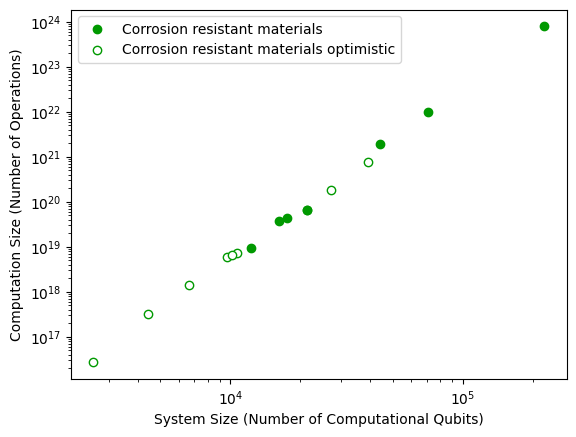

In [4]:
import matplotlib.pyplot as plt

system_size = []
computation_size = []
for model in all_re:
    system_size += [all_re[model]['LogicalQubits']]
    computation_size += [all_re[model]['LogicalQubits']*all_re[model]['T']]

system_size_val = []
computation_size_val = []
for model in all_re_valence:
    system_size_val += [all_re_valence[model]['LogicalQubits']]
    computation_size_val += [all_re_valence[model]['LogicalQubits']*all_re_valence[model]['T']]

plot_color = [0.0,0.6,0.0]
fig, ax = plt.subplots()
ax.scatter(system_size, computation_size, facecolors=plot_color,label = 'Corrosion resistant materials')
ax.scatter(system_size_val, computation_size_val, edgecolors=plot_color,facecolors='white', label = 'Corrosion resistant materials optimistic')
ax.set_xlabel('System Size (Number of Computational Qubits)')
ax.set_ylabel('Computation Size (Number of Operations)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.legend();

## save output

We can save the estimates to a json file formatted for easy input to the QB Plot Tool.

In [4]:
from pyLIQTR.utils.resource_analysis import write_resource_estimation_json

write_resource_estimation_json(estimates=all_re,application_id='corrosion_resistant_materials',category='industrial',plot_legend_name='Corrosion resistant materials',plot_color=plot_color,reference='')

<hr>

With the application circuit in hand, we can do further analysis using the pyLIQTR scheduling, qasm printing, and circuit decomposition capabilities. Please see the [Best Practices](https://isi-usc-edu.github.io/pyLIQTR/_build/html/best_practice.html) for guidance on how to use these tools and refer to the notebooks in [Examples/ApplicationInstances/](../) for detailed demonstrations.